<center><h2><b> Employee Attrition <b></h2></center>

In [1]:
# Import all important libraries...
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df['Attrition'].value_counts(normalize = True)

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
# Just keeping important columns, which will help in predictions...

df.drop(
    ['EmployeeCount','EmployeeNumber','Over18','StandardHours'],
    axis = 1,
    inplace = True
    )

In [9]:
df.shape

(1470, 31)

In [10]:
df['Attrition'] = df['Attrition'].map({"Yes" : 1, "No" : 0})

In [11]:
# Separate categorical & numerical columns

categorical_col = df.select_dtypes(include = "object").columns
numerical_col = df.select_dtypes(exclude = "object").columns

#Apply One-Hot Encoding
df = pd.get_dummies(df, columns = categorical_col, drop_first = True)

In [12]:
# Feature Scaling (BOOSTS Accuracy)
# Algorithms like Logistic Regression & SVM NEED scaling

scaler = StandardScaler()
df[numerical_col] = scaler.fit_transform(df[numerical_col])

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop("Attrition", axis=1)
Y = df["Attrition"]

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

In [14]:
# If Attrition is already numeric (0/1)
if df["Attrition"].dtype != "object":
    df["Attrition"] = df["Attrition"].astype(int)

# If Attrition is text (Yes/No)
else:
    df["Attrition"] = (
        df["Attrition"]
        .astype(str)
        .str.strip()
        .str.lower()
        .map({"yes": 1, "no": 0})
    )

# Drop rows where Attrition is still NaN
df = df.dropna(subset=["Attrition"])


In [15]:
print(df.shape)
print(df["Attrition"].value_counts())


(1470, 45)
Attrition
0    1233
2     237
Name: count, dtype: int64


In [16]:
print(df.shape)
print(df["Attrition"].value_counts(dropna=False))


(1470, 45)
Attrition
0    1233
2     237
Name: count, dtype: int64


In [17]:
# Check original values FIRST
print(df["Attrition"].unique())

# If already numeric (0/1)
if df["Attrition"].dtype != "object":
    df["Attrition"] = df["Attrition"].astype(int)

# If text-based
else:
    df["Attrition"] = (
        df["Attrition"]
        .astype(str)
        .str.strip()
        .str.lower()
        .replace({
            "yes": 1,
            "no": 0,
            "y": 1,
            "n": 0
        })
    )

# Drop rows where Attrition is still invalid
df = df.dropna(subset=["Attrition"])


[2 0]


In [18]:
print(df.shape)
print(df["Attrition"].value_counts())


(1470, 45)
Attrition
0    1233
2     237
Name: count, dtype: int64


In [19]:
X = df.drop("Attrition", axis=1)
Y = df["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [20]:
print(Y_test.unique())
print(Y_test.dtype)

df["Attrition"] = df["Attrition"].astype(int)

X = df.drop("Attrition", axis=1)
y = df["Attrition"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


[-0.4384223   2.28090588]
float64


In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Y_test = Y_test.astype(int)
Y_pred = model.predict(X_test).astype(int)

print("Accuracy:\n", accuracy_score(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))


Accuracy:
 0.8639455782312925
Confusion Matrix:
 [[238   9]
 [ 31  16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           2       0.64      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.76      0.65      0.68       294
weighted avg       0.85      0.86      0.85       294



In [23]:
model_balanced = LogisticRegression(
    class_weight="balanced",
    max_iter=1000
)
model_balanced.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [24]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [25]:
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           2       0.36      0.09      0.14        47

    accuracy                           0.83       294
   macro avg       0.61      0.53      0.52       294
weighted avg       0.77      0.83      0.78       294



In [26]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10)


MonthlyIncome           0.079226
Age                     0.065134
TotalWorkingYears       0.056284
DailyRate               0.053795
MonthlyRate             0.047068
YearsAtCompany          0.045995
DistanceFromHome        0.045910
HourlyRate              0.045403
OverTime_Yes            0.041795
YearsWithCurrManager    0.036186
dtype: float64

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Step 1: Convert your labels from 0,2 -> 0,1
y_train_fixed = y_train.replace({2: 1})
y_test_fixed = y_test.replace({2: 1})  # If you evaluate later

# Step 2: Define the parameter grid
params = {
    "n_estimators": [100, 200],
    "max_depth": [5, 10, None]
}

# Step 3: Create a scorer that explicitly sets pos_label=1
f1_scorer = make_scorer(f1_score, pos_label=1)

# Step 4: GridSearchCV
grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=params,
    scoring=f1_scorer,  # use custom scorer
    cv=5
)

# Step 5: Fit the model
grid.fit(X_train, y_train_fixed)

# Step 6: Best parameters & score
print("Best Parameters:", grid.best_params_)
print("Best F1 Score:", grid.best_score_)

Best Parameters: {'max_depth': None, 'n_estimators': 100}
Best F1 Score: 0.3241518967354834


In [31]:
best_model = grid.best_estimator_


In [32]:
y_final = best_model.predict(X_test)
print(classification_report(y_test, y_final))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00        47

    accuracy                           0.82       294
   macro avg       0.28      0.32      0.30       294
weighted avg       0.72      0.82      0.76       294



C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklea

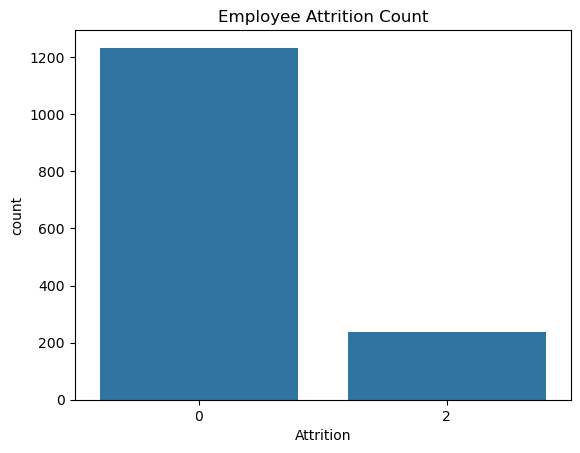

In [33]:
sns.countplot(x="Attrition", data=df)
plt.title("Employee Attrition Count")
plt.show()


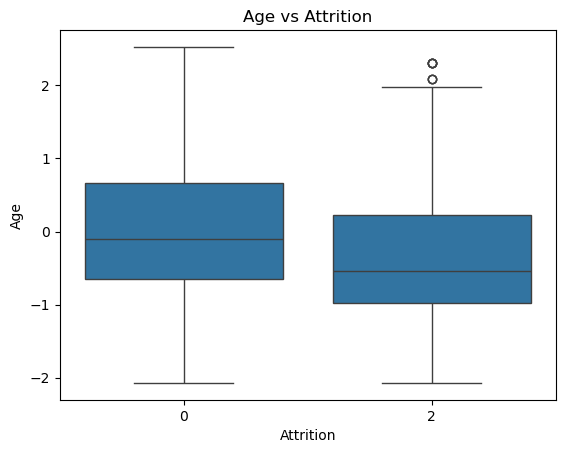

In [34]:
sns.boxplot(x="Attrition", y="Age", data=df)
plt.title("Age vs Attrition")
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_5964\860081176.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["Attrition"]==0]["MonthlyIncome"], label="Stayed", shade=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_5964\860081176.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["Attrition"]==1]["MonthlyIncome"], label="Left", shade=True)


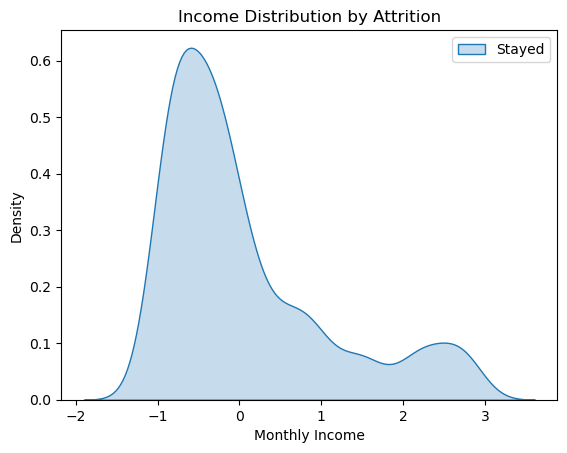

In [35]:
sns.kdeplot(df[df["Attrition"]==0]["MonthlyIncome"], label="Stayed", shade=True)
sns.kdeplot(df[df["Attrition"]==1]["MonthlyIncome"], label="Left", shade=True)
plt.title("Income Distribution by Attrition")
plt.xlabel("Monthly Income")
plt.ylabel("Density")
plt.legend()
plt.show()


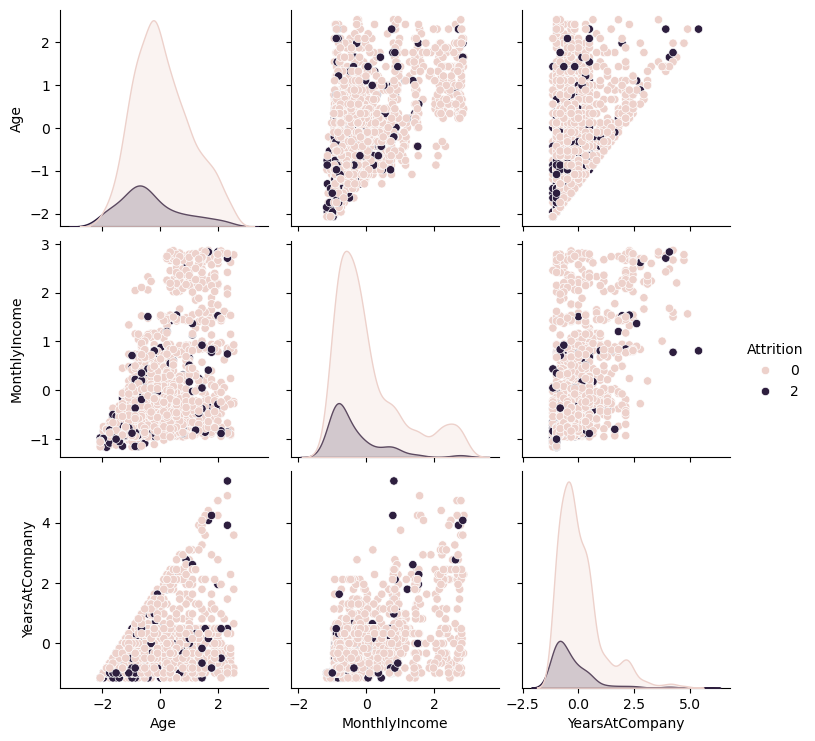

In [42]:
sns.pairplot(df[['Age','MonthlyIncome','YearsAtCompany','Attrition']], hue='Attrition')
plt.show()
